# Credit Card Fraud Detection using Machine Learning

# Outline
- [1 Data Preprocessing](#toc_15456_1)
- [&nbsp;&nbsp; 1.1 Import necessary libraries ](#toc_15456_1.1)
- [&nbsp;&nbsp;1.2 Load the dataset ](#toc_15456_1.2)
- [&nbsp;&nbsp;1.3 Explore the dataset](#toc_15456_1.3)
- [2 Preprocess the data](#toc_15456_2)
- [3 Future scaling](#toc_15456_3)
- [4 Splitting Dataset](#toc_15456_4)
- [5 Model Implementation](#toc_15456_5)
- [&nbsp;&nbsp;5.1 Train Logistic Regression model](#toc_15456_5.1)
- [&nbsp;&nbsp;5.2 Train Random Forest model](#toc_15456_5.2)
- [&nbsp;&nbsp;5.3  Train XGBoost model](#toc_15456_5.3)
- [6 Model Evaluation](#toc_15456_6)
- [&nbsp;&nbsp;6.1 Make predictions](#toc_15456_6.1)
- [&nbsp;&nbsp;6.2 Evaluate models For Logistic Regression](#toc_15456_6.2)
- [&nbsp;&nbsp;6.3 Evaluate models For Random Forests](#toc_15456_6.3)
- [&nbsp;&nbsp;6.4 Evaluate models For XGBoost](#toc_15456_6.4)
- [7 Comparing their Performance](#toc_15456_7)
- [8 Make predictions](#toc_15456_8)
- [9 Visualize the Feature Importances](#toc_15456_9)


<a name="toc_15456_1"></a>
# 1 Data Preprocessing

<a name="toc_15456_1.1"></a>
### 1.1 Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np

<a name="toc_15456_1.2"></a>
### 1.2 Load the dataset: 

In [3]:
df = pd.read_csv('creditcard (1).csv')

<a name="toc_15456_1.3"></a>
### 1.3 Explore the dataset

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<a name="toc_15456_2"></a>
## 2 Preprocess the data

### Check for missing values:


In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


It appears that there are no missing values in the dataset, as the count of missing values for each column is 0.

<a name="toc_15456_3"></a>
## 3 Future scaling

In [12]:
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [13]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<a name="toc_15456_4"></a>
## 4 Splitting Dataset 

#### Splitting Dataset into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Now we have Splitted the data into training (80%) and testing sets (20%)

<a name="toc_15456_5"></a>
## 5 Model Implementation

<a name="toc_15456_5.1"></a>
### 5.1 Train Logistic Regression model

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

<a name="toc_15456_5.2"></a>
### 5.2 Train Random Forest model

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

<a name="toc_15456_5.3"></a>
### 5.3 Train XGBoost model

In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Each model will learn from the training data (X_train and y_train) and be ready to make predictions on the testing data (X_test).

<a name="toc_15456_6"></a>
## 6 Model Evaluation

<a name="toc_15456_6.1"></a>
### 6.1 Make predictions

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

<a name="toc_15456_6.2"></a>
### 6.2 Evaluate models For Logistic Regression

In [21]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.9991222218320986
Precision: 0.8636363636363636
Recall: 0.5816326530612245
F1-score: 0.6951219512195121


<a name="toc_15456_6.3"></a>
### 6.3  Evaluate models For Random Forest

In [22]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9995435553526912
Precision: 0.9615384615384616
Recall: 0.7653061224489796
F1-score: 0.8522727272727273


<a name="toc_15456_6.4"></a>
### 6.4  Evaluate models For XGBoost

In [23]:
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))

XGBoost:
Accuracy: 0.9995611109160493
Precision: 0.9620253164556962
Recall: 0.7755102040816326
F1-score: 0.8587570621468926


<a name="toc_15456_7"></a>
## 7 Comparing their Performance

In [25]:
print("Accuracy:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_logreg)*100:.2f}%")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print(f"XGBoost: {accuracy_score(y_test, y_pred_xgb)*100:.2f}%")

print("\nPrecision:")
print(f"Logistic Regression: {precision_score(y_test, y_pred_logreg)*100:.2f}%")
print(f"Random Forest: {precision_score(y_test, y_pred_rf)*100:.2f}%")
print(f"XGBoost: {precision_score(y_test, y_pred_xgb)*100:.2f}%")

print("\nRecall:")
print(f"Logistic Regression: {recall_score(y_test, y_pred_logreg)*100:.2f}%")
print(f"Random Forest: {recall_score(y_test, y_pred_rf)*100:.2f}%")
print(f"XGBoost: {recall_score(y_test, y_pred_xgb)*100:.2f}%")

print("\nF1-score:")
print(f"Logistic Regression: {f1_score(y_test, y_pred_logreg)*100:.2f}%")
print(f"Random Forest: {f1_score(y_test, y_pred_rf)*100:.2f}%")
print(f"XGBoost: {f1_score(y_test, y_pred_xgb)*100:.2f}%")


Accuracy:
Logistic Regression: 99.91%
Random Forest: 99.95%
XGBoost: 99.96%

Precision:
Logistic Regression: 86.36%
Random Forest: 96.15%
XGBoost: 96.20%

Recall:
Logistic Regression: 58.16%
Random Forest: 76.53%
XGBoost: 77.55%

F1-score:
Logistic Regression: 69.51%
Random Forest: 85.23%
XGBoost: 85.88%


- Based on these metrics, XGBoost seems to be the best-performing model, with the highest accuracy, precision, recall, and F1-score.
- The performance difference between Random Forest and XGBoost is relatively small, but XGBoost has a slight edge.
- Logistic Regression, while having high accuracy, has lower precision, recall, and F1-score compared to the other two models.

<a name="toc_15456_8"></a>
## 8 Make predictions

In [27]:
feature_importances = xgb.feature_importances_
print(feature_importances)

[0.0133491  0.01828657 0.00945204 0.01410305 0.03013981 0.01347463
 0.01091971 0.17710786 0.01636058 0.01254435 0.08113234 0.00977765
 0.0383647  0.01095961 0.29652238 0.01187614 0.03291785 0.02749198
 0.01121833 0.01559111 0.01335532 0.01551021 0.01138663 0.00713699
 0.01293283 0.01214124 0.01573324 0.02656275 0.0142579  0.01939301]


<a name="toc_15456_9"></a>
## 9 Visualize the Feature Importances

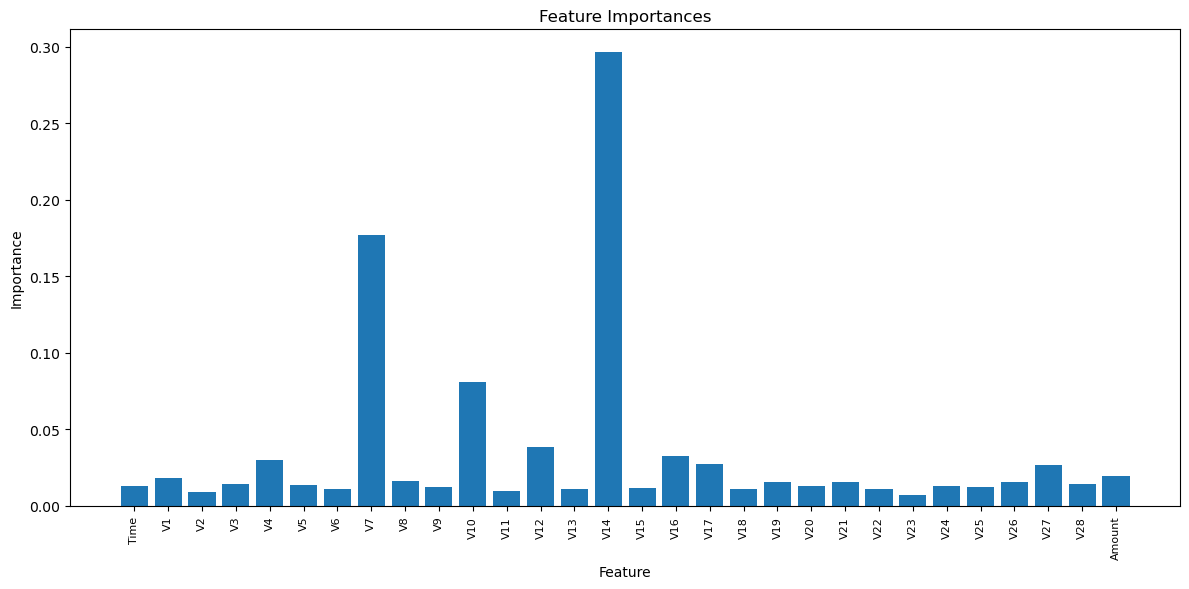

In [29]:
#visualize the feature importances using a bar chart:
import matplotlib.pyplot as plt

feature_importances = xgb.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()
